# Elementos de estadística descriptiva
## Práctica 5


#### Ejercicio 1
Considérese el experimento de lanzar $20$ veces una moneda y obtener la secuencia: $H,T,H,H,T,H,H,T,H,H,T,T,H,T,T,T,H,H,H,T$.
1. Tabular los resultados del experimento anterior encontrando las proporciones de $H$ y $T$ en los $20$ lanzamientos.
2. Graficar las proporciones con barplot y plot.

In [8]:
res<-c("H","T","H","H","T","H","H","T","H","H","T","T","H","T","T","T","H","H","H","T")
proporciones<-prop.table(table(res))
proporciones

res
   H    T 
0.55 0.45 

In [15]:
options(repr.plot.width=5, repr.plot.height=3) #esta línea sólo se ejecuta para jupyterlab con R

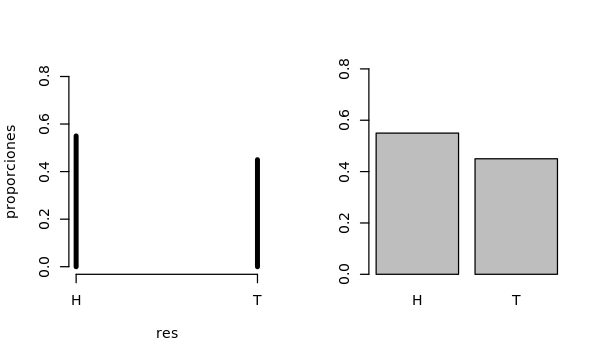

In [32]:
par(mfcol=c(1,2)) #subplots
par(cex=.7)
plot(proporciones, lwd=4, ylim=c(0,.8))
barplot(proporciones, width=.6, ylim=c(0,.8))

#### Ejercicio 2

Para el dataset analizado anteriormente y que se creó: log_mammals realizar:
1. Para datos cuantitativos es común realizar diagramas de tallos y hojas. Investigar la interpretación de estos diagramas y usar la función stem del paquete base de R para realizar tales diagramas a las variables log_body y log_brain e interpretarlas.


In [115]:
library(MASS)
log_mammals<-log(mammals)
head(log_mammals)

,body,brain,r
,<dbl>,<dbl>,<dbl>
Arctic fox,1.2193539,3.795489,2.57613528
Owl monkey,-0.7339692,2.740840,3.47480920
Mountain beaver,0.3001046,2.091864,1.79175947
Cow,6.1420374,6.047372,-0.09466523
Grey wolf,3.5926438,4.783316,1.19067253
Goat,3.3199873,4.744932,1.42494480


In [51]:
print("Leaf plot del cuerpo de los mamiferos")
stem(log_mammals$body,scale=1)

[1] "Leaf plot del cuerpo de los mamiferos"

  The decimal point is at the |

  -4 | 36
  -2 | 880863311
  -0 | 639763211
   0 | 00333557912233344459
   2 | 347366
   4 | 00114612335
   6 | 1338
   8 | 8



En el diaframa de hoja y tallo del cuerpo de los mamíferos podemos notar los siguiente:
* Cada tallo contiene 2 valores (por ejemplo 0 y 1 están listados en 0)
* Los valores van de -5.9 hasta 9.9
* La mediana está entre 0 y 1
* No se perciben valores atípicos
* Parece tener dos modas

In [52]:
print("Leaf plot del cerebro de los mamiferos")
stem(log_mammals$brain)

[1] "Leaf plot del cerebro de los mamiferos"

  The decimal point is at the |

  -2 | 0
  -0 | 4219
   0 | 00269901344677899
   2 | 1445555789022789
   4 | 01467781122228
   6 | 00012552
   8 | 47



En el diaframa de hoja y tallo del cuerpo de los mamíferos podemos notar los siguiente:
* Cada tallo contiene 2 valores (por ejemplo 0 y 1 están listados en 0)
* Los valores van de -3.9 hasta 9.9
* La mediana está entre 2 y 3.9
* No se perciben valores atípicos
* Parece tener tener una distribución normal sesgada a la derecha

2. Scatterplot coloreando diferente a cada grupo que se creó: mamífero pequeño y mamífero grande con la variable size_body.

In [56]:
med_body<-median(mammals$body)
log_mammals$body_size<-ifelse(log_mammals$body>=med_body,"grande","pequenio")
med_brain<-median(mammals$brain)
log_mammals$brain_size<-ifelse(log_mammals$brain>=med_brain,"grande","pequenio")
head(log_mammals)

,body,brain,body_size,brain_size
,<dbl>,<dbl>,<chr>,<chr>
Arctic fox,1.2193539,3.795489,pequenio,pequenio
Owl monkey,-0.7339692,2.740840,pequenio,pequenio
Mountain beaver,0.3001046,2.091864,pequenio,pequenio
Cow,6.1420374,6.047372,grande,pequenio
Grey wolf,3.5926438,4.783316,grande,pequenio
Goat,3.3199873,4.744932,pequenio,pequenio


In [57]:
library(ggplot2)

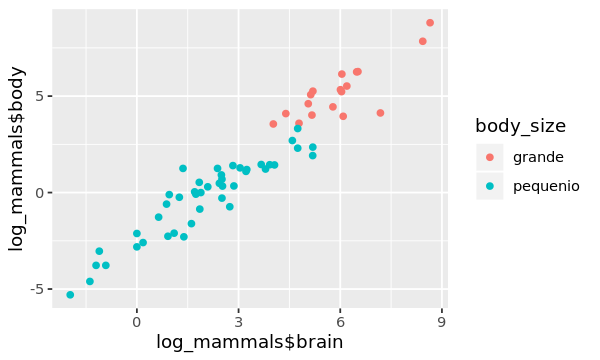

In [77]:
g<-ggplot(data=log_mammals,aes(x=log_mammals$brain,y=log_mammals$body))+
    geom_point(aes(color=body_size))
g

3. Instalar el paquete dplyr para colocar los datos en un formato long y se pueda graficar con el paquete de ggplot2 con la función  gather el dataframe log_mammals. Después de instalar tal paquete, realizar mismo enunciado que a) pero con geom_points y paquete ggplot2.


In [90]:
install.packages("dplyr")

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://cloud.r-project.org/src/contrib:
  cannot open URL 'https://cloud.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'dplyr' is not available (for R version 3.6.0)"

4. Calcular estadísticas como el promedio, mediana, máximo y mínimo por grupos de mamífero pequeño y mamífero grande con dplyr y funciones como group_by, sumarise y el operador %>% (pipe). Ver como ayuda: Data Wrangling with dplyr and tidyr o Data Transformation with dplyr o bien como ejemplo de uso: https://genomicsclass.github.io/book/pages/dplyr_tutorial.html u otro tutorial en la red de dplyr ¿qué mamíferos en cada grupo están en los tres primeros lugares (pensando que se ordenan de forma decreciente en log_brain)?.

In [119]:
install.packages("dplyr")

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://cloud.r-project.org/src/contrib:
  cannot open URL 'https://cloud.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'dplyr' is not available (for R version 3.6.0)"

5. Crea una nueva variable r que sea el cociente entre brain y body. Ordena en orden creciente el dataset de mammals de acuerdo a esta nueva variable. ¿Qué mamíferos tienen los cocientes más grandes? ¿y cuáles los más pequeños?

In [118]:
mammals_r<-mammals
mammals_r$r<-mammals$brain/mammals$body
print("Los animales con r más grande son:")
head(mammals_r[order(mammals_r$r,decreasing=TRUE),])

[1] "Los animales con r m<U+00E1>s grande son:"


,body,brain,r
,<dbl>,<dbl>,<dbl>
Ground squirrel,0.101,4.00,39.60396
Owl monkey,0.480,15.50,32.29167
Lesser short-tailed shrew,0.005,0.14,28.00000
Rhesus monkey,6.800,179.00,26.32353
Galago,0.200,5.00,25.00000
Little brown bat,0.010,0.25,25.00000


6. Usando 5 realiza un scatterplot de r vs body.

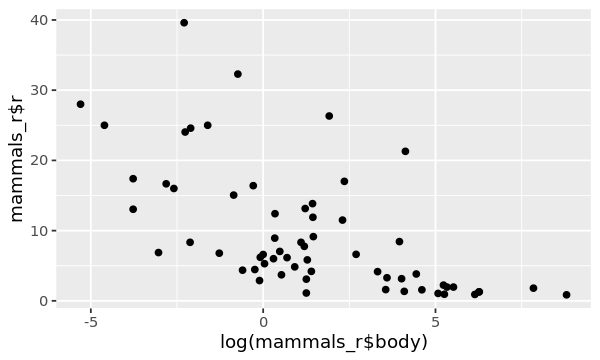

In [121]:
g<-ggplot(data=mammals_r,aes(x=log(mammals_r$body),y=mammals_r$r))+
    geom_point()
g

#### Ejercicio 3
Considérese el dataset randu (ejecutar ?randu para una descripción):

1. Usar la función mean para calcular la media muestral en cada uno de los números que forman la tripleta: $x, y, z$. Asimismo usar la función var para calcular una matriz de varianzas y covarianzas muestral.

In [141]:
data<-randu
print("La media de X es")
mean(data$x)
print("La media de Y es")
mean(data$y)
print("La media de Z es")
mean(data$z)

print("La matriz de varianzas:")
var(data)


print("La matriz de covarianzas:")
cov(data)


[1] "La media de X es"


[1] 0.5264293

[1] "La media de Y es"


[1] 0.4860531

[1] "La media de Z es"


[1] 0.4809547

[1] "La matriz de varianzas:"


,x,y,z
x,0.081231885,-0.004057683,0.004637656
y,-0.004057683,0.086270206,-0.005148432
z,0.004637656,-0.005148432,0.077860433


[1] "La matriz de covarianzas:"


,x,y,z
x,0.081231885,-0.004057683,0.004637656
y,-0.004057683,0.086270206,-0.005148432
z,0.004637656,-0.005148432,0.077860433


2. Queremos ver la distribución del promedio por renglón de cada observación del dataset randu, para esto utilizar la función de apply para calcular tal promedio, alternativamente usar rowMeans.


In [146]:
data$means<-rowMeans(data)
head(data)

x,y,z,means
<dbl>,<dbl>,<dbl>,<dbl>
0.000031,0.000183,0.000824,0.0003460
0.044495,0.155732,0.533939,0.2447220
0.822440,0.873416,0.838542,0.8447993
0.322291,0.648545,0.990648,0.6538280
0.393595,0.826873,0.418881,0.5464497
0.309097,0.926590,0.777664,0.6711170


3. Utilizar la función hist del paquete base para calcular un histograma con los breaks definido por tal función.


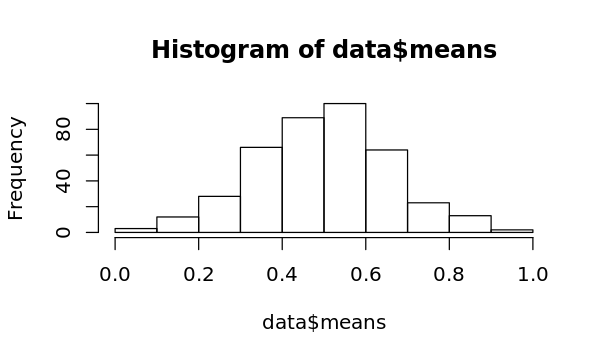

In [147]:
hist(data$means)

4. Calcular sus propios breaks y volver a graficar el histograma con hist y con geom_histogram del paquete ggplot2.


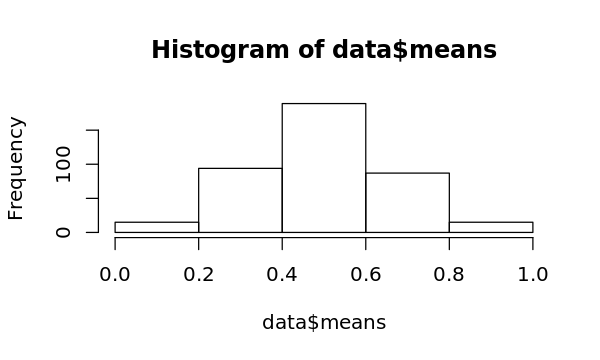

In [150]:
hist(data$means,breaks=c(0,.2,.4,.6,.8,1))

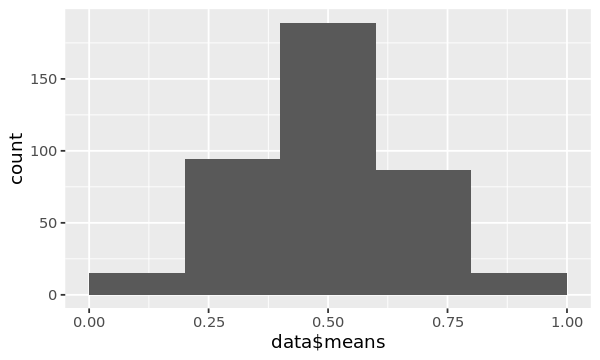

In [152]:
g<-ggplot()+geom_histogram(aes(data$means),breaks=c(0,.2,.4,.6,.8,1))
g


5. Utilizar la función qqnorm para comparar los cuantiles de una distribución normal con la distribución de las medias muestrales obtenidos en el inciso b). Sólo de forma visual ¿qué se puede concluir sobre la distribución de las medias muestrales calculadas en b)? (puedes añadir una línea al gráfico con qqline).

[1] "Se puede concluir que tienen una distribuci<U+00F3>n normal"


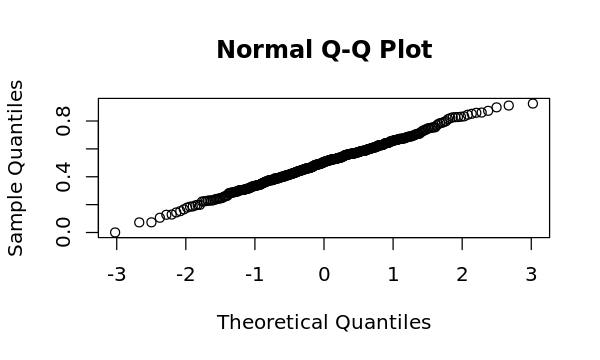

In [159]:
qqnorm(data$means)
print("Se puede concluir que tienen una distribución normal")

## Ejercicio 4
Realizar gráficas con el comando qqplot para comparar $2$ distribuciones de datos, por ejemplo:

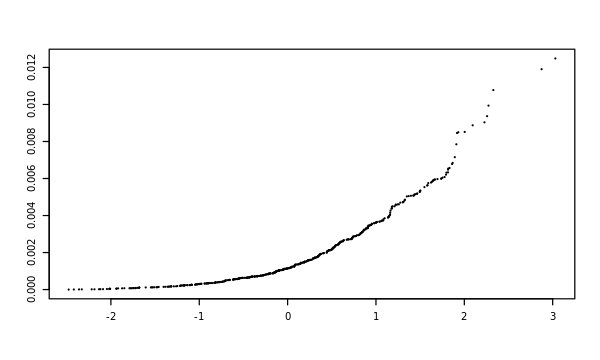

In [165]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n)/n, cex=.1, xlab='', ylab='')

En esta distribución los datos están sesgados a la izquierda por que es concava hacia arriba. También por que en la parte de la derecha podemos observar que hay menor densidad de puntos.

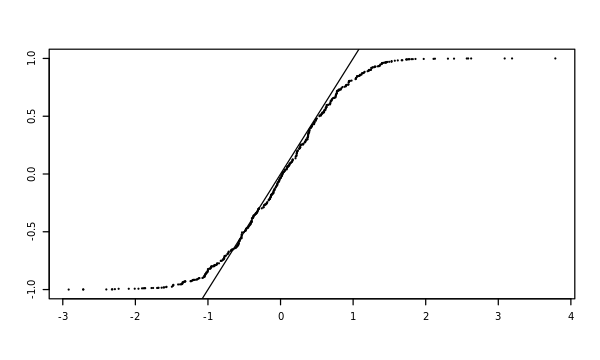

In [180]:
n<-500
set.seed(200)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n) ,sin(rnorm(n)), cex=.1, xlab='', ylab='')
abline(0,1)

Esta distribución da la impresión de que es una distribución de tener pocos elementos en las colas, también de comportarse como una distribución uniforme en toda la parte central.

# Distribuciones comunes
#### Ejercicio 1
Supóngase que el tiempo (en minutos) que una persona espera el Metrobús los días de semana sigue una distribución uniforme dada por, $$f(x) = \begin{cases}
\frac{1}{12} ; \text{si } 0 \leq x \leq 12,\\
0 ; \text{en otro caso}
\end{cases}$$
1. ¿Cuál es la probabilidad que una persona espere menos de $6$ minutos?.
2. ¿Su tiempo medio de espera? ¿su desviación estándar?.

In [185]:
print("Es una distribucion de caso continuo")
print("La probabilidad de esperar menos de 6 minutos es")
punif(6,0,12)

[1] "Es una distribucion de caso continuo"
[1] "La probabilidad de esperar menos de 6 minutos es"


[1] 0.5

El tiempo medio de espera es:
$$\mu = \frac{0+12}{2} = 6 \text{ minutos}$$

La desviación estandar es:
$$\sigma = \sqrt{\frac{(12-0)^2}{12}} = 3.46 \text{ minutos}.$$

#### Ejercicio 2
Considérese lanzamientos de una moneda no cargada. Sea $X$ la variable aleatoria que cuenta el número de águilas en $10$ lanzamientos. Calcular en R la probabilidad $P(X \geq 3)$ con la función pbinom y dbinom, el número medio de águilas y su desviación estándar.

In [229]:
print("La probabilidad de obtener 3 o mas aguilas es_:")
sum(dbinom(c(3:10),10,1/2))

print("La probabilidad de obtener 3 o mas aguilas es (usando pbinom):")
pbinom(2,10,1/2,lower.tail=FALSE)

[1] "La probabilidad de obtener 3 o mas aguilas es_:"


[1] 0.9453125

[1] "La probabilidad de obtener 3 o mas aguilas es (usando pbinom):"


[1] 0.9453125

El número medio de águilas es:
$$\mu = np = 10*\frac{1}{2} = 5$$

con desviación estándar:
$$\sigma = \sqrt{np(1-p)} = \sqrt{10*\frac{1}{2}*\frac{1}{2}} \approx 1.5811$$

#### Ejercicio 3
Considérese una población de votantes en la ciudad de México. Se reporta que la proporción de votantes que favorecen al candidato del partido Naranja es igual a $0.40$. Dada una muestra aleatoria de $200$ votantes, ¿cuál es la probabilidad de que más de la mitad de ellos tengan intención de voto por el candidato naranja? Usar:
1. pbinom

In [21]:
print("La probabilidad de que la mitad del ellos voten pro el candidato naranja es:")
pbinom(100,200,.6)


[1] "La probabilidad de que la mitad del ellos voten pro el candidato naranja es:"


[1] 0.002635403

2. El teorema del límite central y pnorm considerando lo que se conoce como corrección por continuidad: si $B$ es variable aleatoria binomial con $\mu$ y $\sigma$ entonces $P(B=k) = P(k-0.5 <X<k+0.5)$ con $X$ variable aleatoria normal $N(\mu,\sigma)$ y $k$ un número entero no negativo.


4) Supongamos que el ingreso anual de un imigrante mexicano en los EUA se distribuye de forma normal con una media de $\$30,000$ y una desviación estándar de $\$10,000$ dólares. ¿Cuál es la probabilidad de que un inmigrante mexicano gane menos de $\$20,000$ dólares anuales? ¿Cuál es la probabilidad de que su ingreso sea mayor a los $\$50,000$ dólares anuales? (usar R).

In [32]:
mu<-30000
sigma<-10000

print("La prob de que gane menos de 20,000 es:")
pnorm(20000,mu,sigma)

print("La prob de que gane mas de 50,000 es:")
pnorm(50000,mu,sigma,lower.tail=FALSE)

[1] "La prob de que gane menos de 20,000 es:"


[1] 0.1586553

[1] "La prob de que gane mas de 50,000 es:"


[1] 0.02275013

Por: Juan Pablo Herrera
CU: 108353
Propedeutico MCD